In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import json
import clustering
from clustering.what_if_model import WhatIfModel
from clustering.pqp_input_parser import PQPInputParser
from clustering.util import create_model
import autoreload
import clustering.evaluation

%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', -1)

In [2]:
BASE_PATH_TPCH = "~/Dokumente/repos/example_plugin/stats/final/tpch/sf1-2d/"
TPCH_ORDERKEY = f"{BASE_PATH_TPCH}/l_orderkey"
TPCH_SHIPDATE = f"{BASE_PATH_TPCH}/l_shipdate"
TPCH_PARTKEY = f"{BASE_PATH_TPCH}/l_partkey"

In [38]:
m = create_model("lineitem", PQPInputParser("tpch", TPCH_ORDERKEY), 2)

cost_model_output/models/


# JOIN EVALUATION

In [39]:
CLUSTERING_COLUMN = "l_shipdate"
SIDED = True
join_results = clustering.evaluation.evaluate_join_step(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100], "ALL", SIDED)


print(f"There are {len(join_results)} joins")
join_results['e'] = join_results['TOTAL_ERROR'] ** 2
join_results.sort_values(['e'], ascending=False)[["QUERY_HASH1", "DESCRIPTION1", "RUNTIME_BASE_MS", "RUNTIME_ESTIMATE_MS", "RUNTIME_CLUSTERED_MS", "RELATIVE_ERROR", "TOTAL_ERROR_MS"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 30 joins with estimated negative run time. This is bad.
           QUERY_HASH  \
1    af04794535660bfb   
6    550d82dfc9e49105   
20   ca18c361736e9938   
24   bc9c5b09f7327ee    
27   581025346a1e14fe   
37   32c23f6f991a064d   
48   efe8810009ceeca4   
63   65e8223a5ee91fb8   
77   7c90cd3a1b165fad   
100  e16ba5ded0a91c94   
103  3c13b8ba3d206f05   
120  dbd83f57b52f1255   
143  cede475d1331e7a4   
162  1f28a146cc97b628   
193  831b52708146a2fc   
211  8dc3fd52eb6d3c3d   
232  10a29f9a2f853b35   
266  85f4234992993c80   
277  e9654abe67e3ba08   
291  f5b4c95553e02910   
310  f6311ed25cf11ce6   
318  ab8e3343baeab48e   
338  58d150518c8f1926   
375  6cb6d54beeff1622   
459  de539b0082efe7f2   
519  73b23b8a1b9c71cd   
569  

383 joins with lineitem as probe or build side
There are 383 joins


,QUERY_HASH1,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,RELATIVE_ERROR,TOTAL_ERROR_MS
230,aa61c7c63d209daf,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,135,200,108,0.542015,-91
362,f39f4116b27ebc04,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,131,200,112,0.560622,-88
366,f6190012594cc036,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,143,200,112,0.563354,-87
291,ce243643fa25f4,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,141,193,109,0.564957,-84
159,70918466ca2b12e7,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,133,193,109,0.567556,-83
324,e61e203cab97966a,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,133,193,110,0.571075,-83
7,20e42e320de74706,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,140,193,110,0.572593,-82
346,ed6641de1dfe8bc1,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,133,193,111,0.577551,-81
132,6730c267d3eac48a,JoinHash (Semi Join where l_orderkey = l_orderkey) Radix bits: 1,143,171,245,1.434032,74
192,8e622f0e207e6f18,JoinHash (Semi Join where l_orderkey = o_orderkey) Radix bits: 1,132,189,115,0.609483,-74


In [40]:
old_join_results = None
#old_join_results = join_results

There are 383 operators

63% of the operator estimates are over- or underestimated between factor 1 and 1.5
16% of the operator estimates are over- or underestimated between factor 1.5 and 3
15% of the operator estimates are over- or underestimated between factor 3 and 100
4% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 18,020 ms
Total estimate: 21,629 ms
Total measured: 21,144 ms
MSE: 497 ms^2
SMAPE: 51%


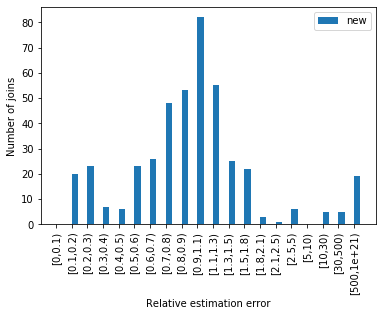

In [41]:
clustering.evaluation.print_aggregated_metrics(join_results, m.query_frequencies)
fig = clustering.evaluation.plot_join_errors(join_results, old_join_results, m.query_frequencies)
#old_join_results = join_results
fig

In [ ]:
joindbg = pd.read_csv(TPCH_SHIPDATE + "/joins.csv", sep='|')
joindbg.dropna(inplace=True)
joindbg['BUILD_COLUMN'] = joindbg.apply(lambda x: x[f"{x['BUILD_SIDE']}_COLUMN_NAME"], axis=1)
joindbg['PROBE_COLUMN'] = joindbg.apply(lambda x: x[f"{x['PROBE_SIDE']}_COLUMN_NAME"], axis=1)
viewcols = ['QUERY_HASH', 'IS_FLIPPED', 'PROBE_SORTED', 'BUILD_SORTED', 'PROBE_COLUMN', 'BUILD_COLUMN', 'DESCRIPTION']
joindbg[joindbg['QUERY_HASH'] == '3534234c34669919'][viewcols]

# SCAN EVALUATION

In [42]:
CLUSTERING_COLUMN = "l_shipdate"
scan_results = clustering.evaluation.evaluate_scans(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(scan_results)} scans on {m.table_name}")

scan_results['e'] = scan_results['TOTAL_ERROR'] ** 2
scan_results['DESC'] = scan_results.apply(lambda x: " ".join(x['DESCRIPTION1'].split(" ")[3:]), axis=1)
scan_results.sort_values(['e'], ascending=False)[["QUERY_HASH", "DESC", "COLUMN_NAME", "RUNTIME_BASE", "RUNTIME_ESTIMATE", "RUNTIME_CLUSTERED", "TOTAL_ERROR", "RELATIVE_ERROR"]]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 29 negative scan estimates. This is bad.
           QUERY_HASH  \
69   33d198b26945d669   
70   129f61e2f3ecf0ef   
71   9ba244c4795319f2   
85   cc8ca2d4264204b1   
86   a23672782a2a93af   
88   8f1f30dfee59c323   
95   96d8fcdffa88f938   
131  c285de8ddda592f2   
153  e61e203cab97966a   
159  4582f099547f7754   
160  f39f4116b27ebc04   
178  70918466ca2b12e7   
199  f6190012594cc036   
202  aa61c7c63d209daf   
214  cca164d8b97d6685   
215  548b15e67b35ba6b   
217  df58c685a959c044   
253  dab074f4f1f6b006   
272  20e42e320de74706   
284  8e622f0e207e6f18   
295  ce243643fa25f4     
375  9f3c5fc752625649   
383  ed6641de1dfe8bc1   
389  716441263d3331d0   
409  8d5b7952e19e73c    
435  9762c3a887e47469   
465  57444d10d8dbc8b

,QUERY_HASH,DESC,COLUMN_NAME,RUNTIME_BASE,RUNTIME_ESTIMATE,RUNTIME_CLUSTERED,TOTAL_ERROR,RELATIVE_ERROR
77,7a589f8ab18426d6,l_shipdate <= '1998-09-21',l_shipdate,37853140,33218911,12862383,-20356528,0.387201
9,3898d8ff5bfa1046,l_shipdate <= '1998-10-02',l_shipdate,41114101,33247171,12915536,-20331635,0.388470
67,6fb3f7e54d76ceed,l_shipdate <= '1998-09-27',l_shipdate,40786385,33050954,12755170,-20295784,0.385924
2,1a48bd3a39e20462,l_shipdate <= '1998-09-16',l_shipdate,34045496,27002429,11103945,-15898484,0.411220
121,d4f9e149097d68f9,l_shipdate <= '1998-08-18',l_shipdate,34214733,27002429,11125597,-15876832,0.412022
50,6081c4fbd55e16ea,l_shipdate <= '1998-09-08',l_shipdate,36396925,27002429,11177981,-15824448,0.413962
29,4e4cb5b90ba5de03,l_shipdate <= '1998-08-04',l_shipdate,37591149,27002429,12621554,-14380875,0.467423
95,9a1adec8eeee6ec1,l_shipdate <= '1998-08-27',l_shipdate,40995363,27002429,12720107,-14282322,0.471073
45,5aa537e0d658225a,l_shipdate <= '1998-08-09',l_shipdate,38909208,27002429,12777241,-14225188,0.473189
141,f16984c46aa94970,l_shipdate <= '1998-09-01',l_shipdate,35980225,27002429,12876841,-14125588,0.476877


In [31]:
old_scan_results = None

There are 157 operators

20% of the operator estimates are over- or underestimated between factor 1 and 1.5
45% of the operator estimates are over- or underestimated between factor 1.5 and 3
15% of the operator estimates are over- or underestimated between factor 3 and 100
18% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 1,434 ms
Total estimate: 639 ms
Total measured: 336 ms
MSE: 19 ms^2
SMAPE: 93%


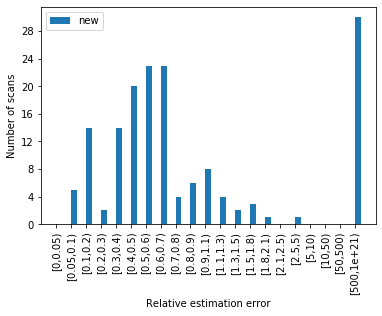

In [43]:
clustering.evaluation.print_aggregated_metrics(scan_results, m.query_frequencies)
fig = clustering.evaluation.plot_scan_errors(scan_results, old_scan_results, m.query_frequencies)
#old_scan_results = scan_results
fig

In [ ]:

#scan_results['DESCRIPTION1'].apply(lambda x: "Like" in x).any()

In [ ]:
scan_results[scan_results['RUNTIME_ESTIMATE'] == 1]

# AGGREGATE EVALUATION

In [44]:
#CLUSTERING_COLUMN = "l_partkey"
CLUSTERING_COLUMN = "l_shipdate"
#aggregate_results = clustering.evaluation.evaluate_aggregates(m, TPCH_PARTKEY, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
aggregate_results = clustering.evaluation.evaluate_aggregates(m, TPCH_SHIPDATE, [CLUSTERING_COLUMN], CLUSTERING_COLUMN, [100])
print(f"There are {len(aggregate_results)} aggregates")
aggregate_results['e'] = aggregate_results['TOTAL_ERROR'] ** 2
aggregate_results.sort_values(['e'], ascending=False)[['QUERY_HASH', 'DESCRIPTION1', 'RUNTIME_BASE_MS', 'RUNTIME_ESTIMATE_MS', 'RUNTIME_CLUSTERED_MS', 'TOTAL_ERROR_MS', 'RELATIVE_ERROR', 'RUNTIME_ESTIMATE']]

## Estimating ColumnBetween scans
## Estimating ColumnVsValue scans

## Estimating REFERENCE DATA joins
## Estimating REFERENCE REFERENCE joins

## Estimating AggregateHash aggregates
adding column COLUMN_TYPE_DATA
adding column INPUT_COLUMN_SORTED_1.0

There are 235 aggregates


,QUERY_HASH,DESCRIPTION1,RUNTIME_BASE_MS,RUNTIME_ESTIMATE_MS,RUNTIME_CLUSTERED_MS,TOTAL_ERROR_MS,RELATIVE_ERROR,RUNTIME_ESTIMATE
108,7a589f8ab18426d6,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,459","1,307","1,458",151,1.115622,1307702301
77,5aa537e0d658225a,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,540","1,288","1,419",130,1.101543,1288793459
132,9a1adec8eeee6ec1,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,514","1,288","1,416",127,1.099274,1288793459
55,4e4cb5b90ba5de03,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,521","1,288","1,409",120,1.093285,1288793459
97,6fb3f7e54d76ceed,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,494","1,333","1,434",100,1.075706,1333478098
148,a795bcf5e93582f1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),645,835,911,76,1.091799,835158690
36,3898d8ff5bfa1046,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,499","1,524","1,452",-71,0.952860,1524332772
162,b9d744d428f1b8a1,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),622,835,906,71,1.085057,835158690
66,5689aad98171d7d2,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),616,835,897,62,1.074961,835158690
82,6081c4fbd55e16ea,"AggregateHash GroupBy ColumnIDs: 5, 6 Aggregates: SUM(l_quantity), SUM(l_extendedprice), SUM(l_extendedprice * (1 - l_discount)), SUM((l_extendedprice * (1 - l_discount)) * (1 + l_tax)), AVG(l_discount), COUNT(*)","1,309","1,312","1,250",-62,0.952608,1312318160


In [17]:
old_aggregate_results = None

There are 235 operators

51% of the operator estimates are over- or underestimated between factor 1 and 1.5
28% of the operator estimates are over- or underestimated between factor 1.5 and 3
20% of the operator estimates are over- or underestimated between factor 3 and 100
0% of the operator estimates are over- or underestimated between factor 100 and 1e+21

Base clustering: 25,556 ms
Total estimate: 26,455 ms
Total measured: 27,483 ms
MSE: 582 ms^2
SMAPE: 53%


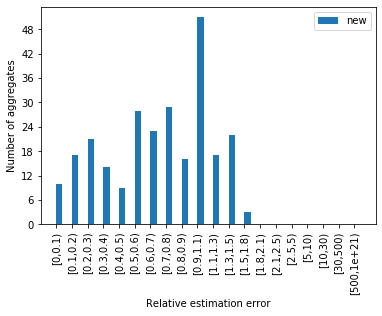

In [45]:
clustering.evaluation.print_aggregated_metrics(aggregate_results, m.query_frequencies)
fig = clustering.evaluation.plot_aggregate_errors(aggregate_results, old_aggregate_results, m.query_frequencies)
#old_aggregate_results = aggregate_results
fig

In [14]:
m.aggregates[(m.aggregates['GROUP_COLUMNS'] == 1) & (m.aggregates['AGGREGATE_COLUMNS'] == 1) & (m.aggregates['RUNTIME_NS'] > 500e6)]
#m.aggregates[m.aggregates['COLUMN_NAME'] == 'l_orderkey,l_quantity']

,OPERATOR_TYPE,QUERY_HASH,OPERATOR_HASH,LEFT_INPUT_OPERATOR_HASH,RIGHT_INPUT_OPERATOR_HASH,COLUMN_TYPE,TABLE_NAME,COLUMN_NAME,GROUP_COLUMNS,AGGREGATE_COLUMNS,...,OUTPUT_ROWS,GROUP_BY_KEY_PARTITIONING_NS,AGGREGATING_NS,GROUP_BY_COLUMNS_WRITING_NS,AGGREGATE_COLUMNS_WRITING_NS,OUTPUT_WRITING_NS,RUNTIME_NS,DESCRIPTION,INPUT_ORDERED,OPERATOR_IMPLEMENTATION
67,AGGREGATE,5689aad98171d7d2,0x7f30a86a0c10ec0bcb7dddbdddd9,0x7f30a13604d0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,45079035,491004906,27337155,27096327,21373,602025775,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
149,AGGREGATE,a795bcf5e93582f1,0x7f30a86a1d90ec0bcb7dddbdddd9,0x7f30a135e4f0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,55549269,518706726,27536705,30993653,17042,644250842,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
162,AGGREGATE,b9d744d428f1b8a1,0x7f30a5d75150ec0bcb7dddbdddd9,0x7f30a13b5bf0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,45813254,501580258,29526123,31347701,17392,619897778,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
174,AGGREGATE,c64dec9688a08c55,0x7f30a505e010ec0bcb7dddbdddd9,0x7f30a13606b0439ed1728d1d06a1,nan,REFERENCE,lineitem,"l_orderkey,l_quantity",1,1,...,1500000,43469299,499388008,26884973,29296330,21373,610489201,AggregateHash GroupBy ColumnIDs: 0 Aggregates: SUM(l_quantity),1,AggregateHash
